In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import cv2
from keras.models import model_from_json
import numpy as np
import os
import matplotlib as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

(28709, 224, 224, 3) (0,)


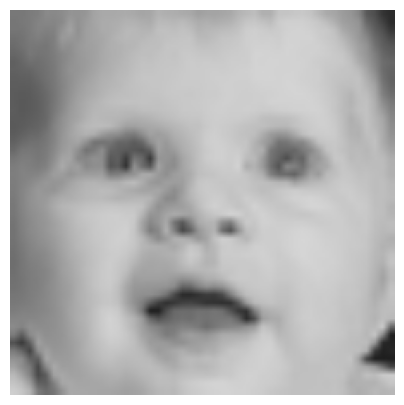

In [4]:
train_path= r'Downloads/Project 1/Project 1/train'
x_train=[]
train_labels = []
classes = 7
for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(img_arr)

train_x=np.array(x_train)
train_labels = np.array(train_labels)
print(train_x.shape, train_labels.shape)

In [5]:
train_data_gen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
train_generator = train_data_gen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical')


Found 28709 images belonging to 7 classes.


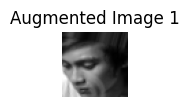

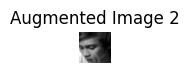

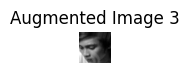

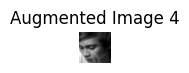

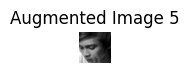

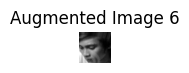

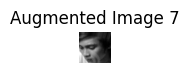

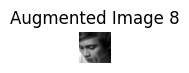

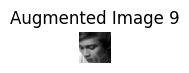

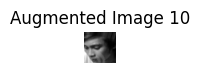

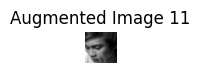

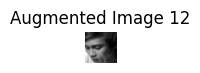

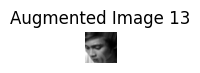

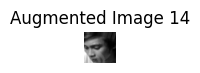

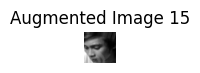

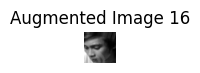

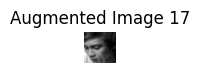

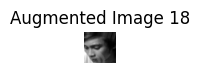

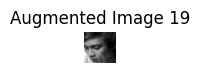

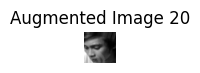

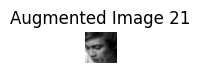

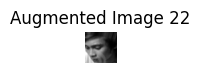

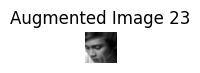

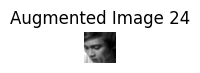

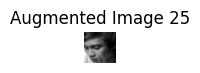

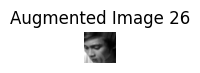

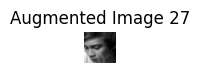

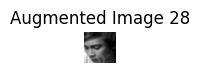

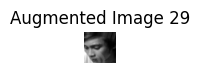

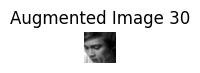

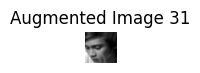

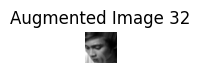

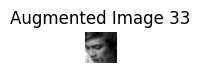

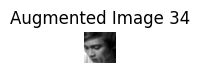

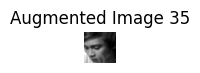

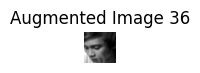

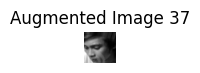

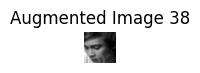

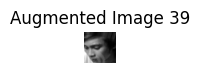

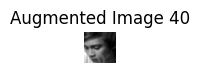

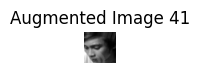

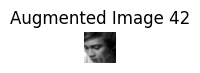

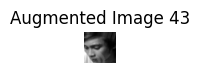

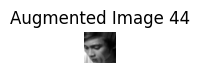

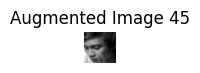

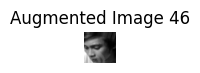

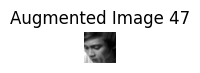

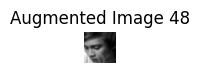

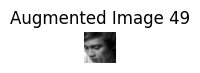

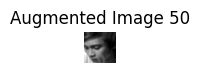

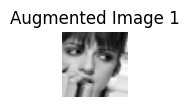

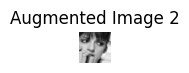

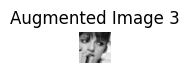

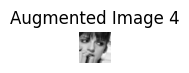

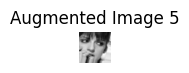

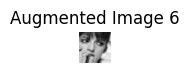

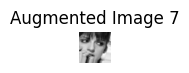

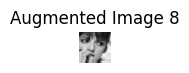

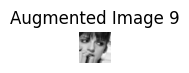

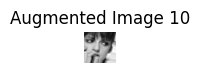

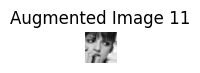

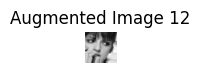

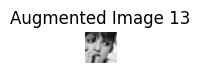

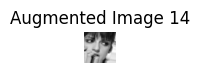

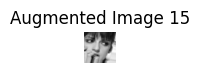

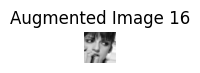

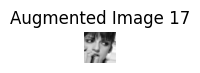

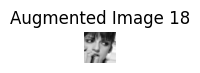

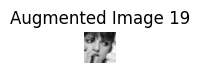

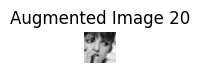

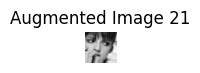

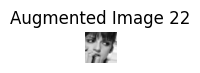

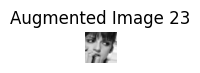

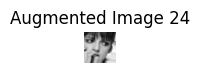

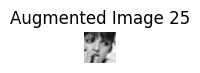

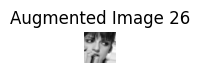

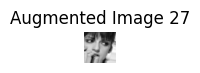

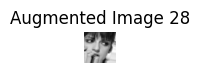

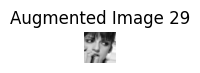

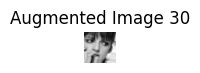

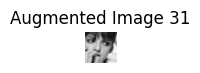

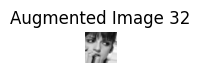

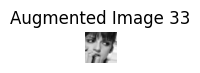

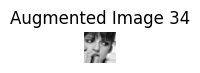

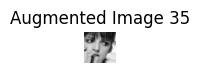

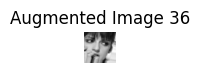

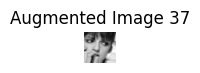

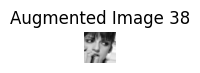

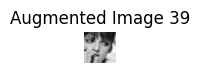

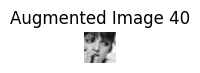

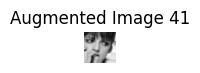

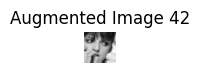

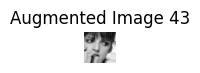

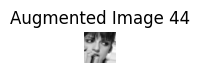

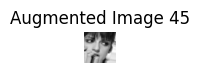

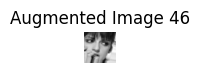

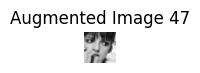

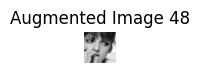

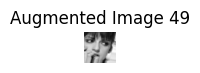

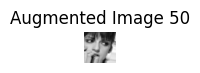

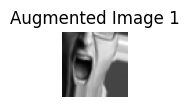

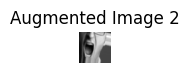

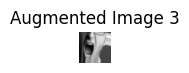

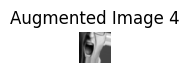

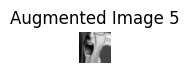

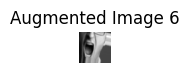

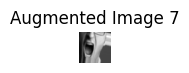

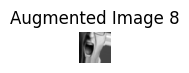

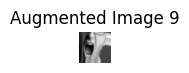

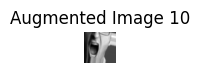

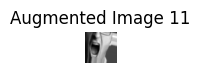

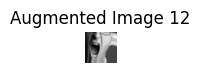

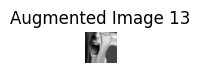

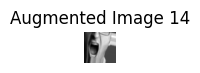

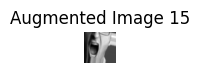

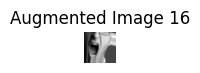

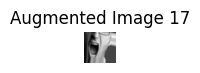

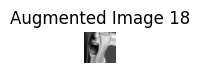

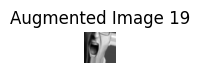

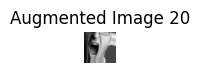

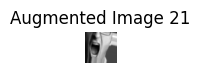

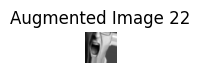

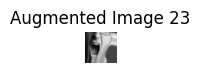

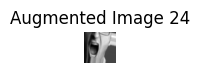

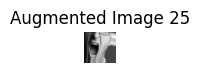

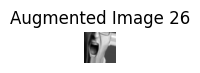

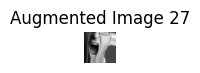

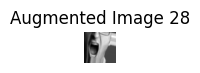

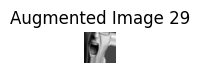

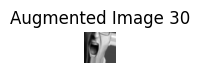

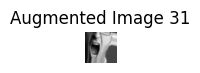

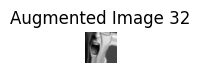

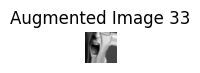

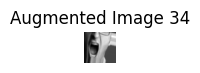

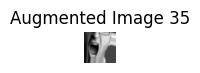

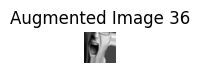

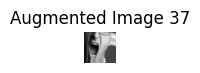

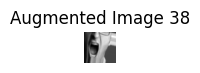

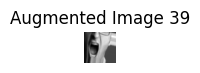

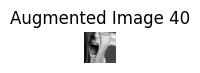

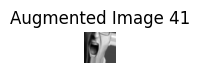

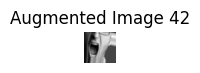

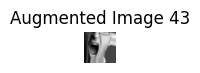

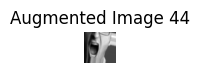

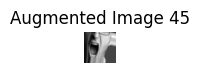

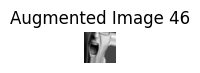

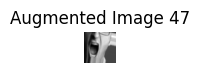

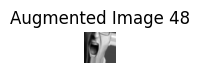

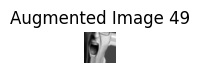

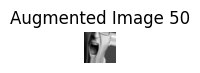

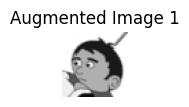

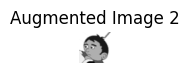

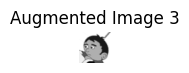

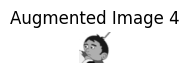

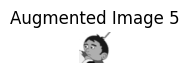

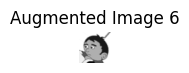

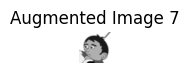

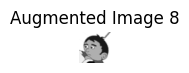

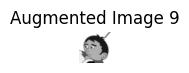

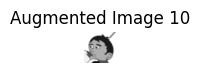

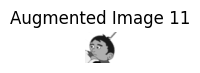

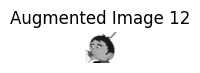

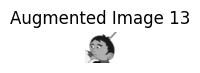

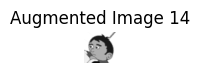

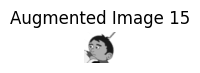

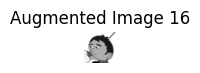

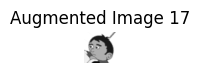

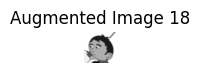

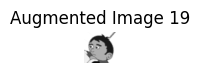

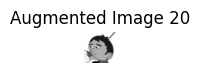

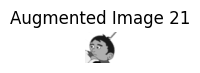

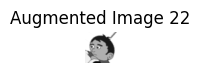

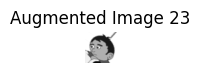

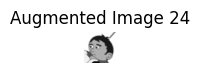

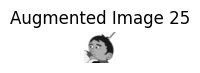

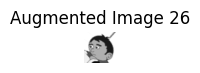

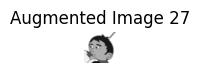

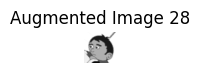

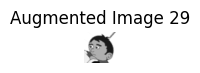

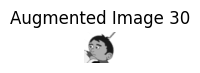

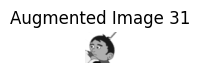

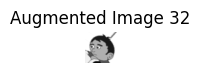

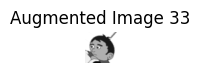

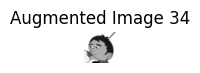

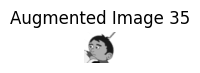

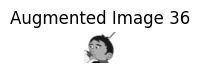

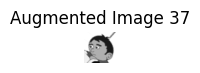

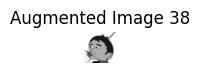

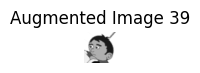

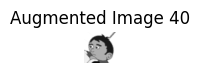

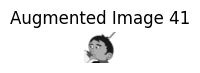

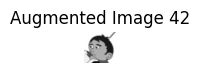

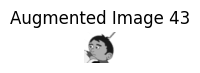

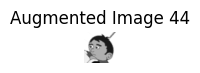

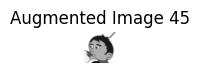

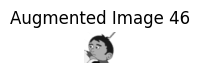

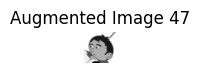

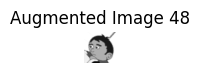

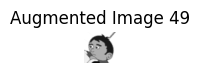

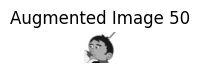

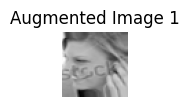

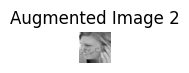

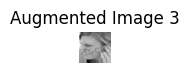

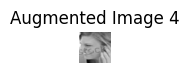

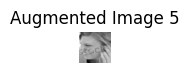

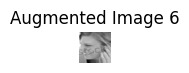

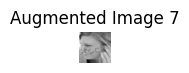

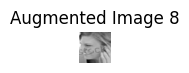

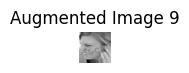

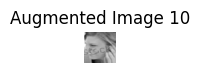

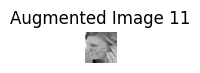

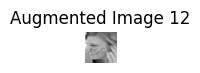

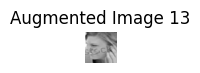

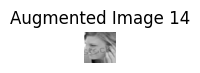

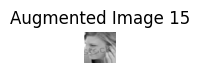

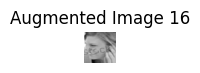

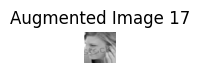

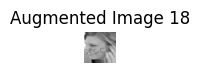

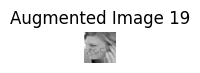

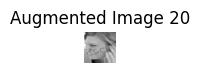

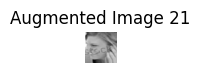

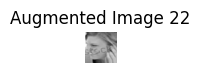

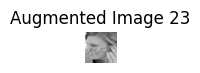

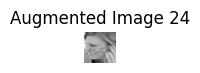

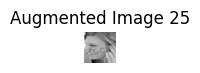

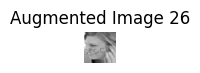

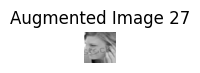

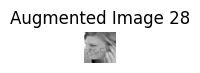

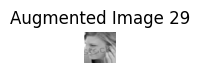

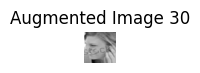

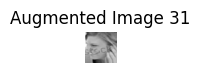

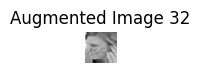

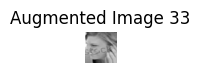

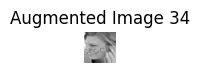

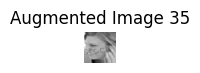

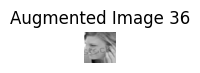

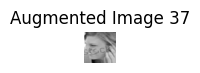

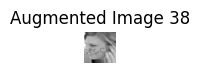

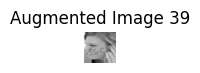

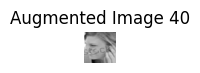

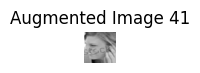

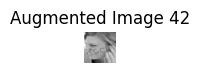

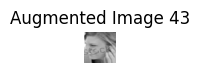

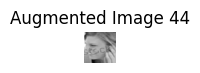

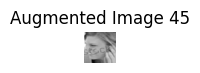

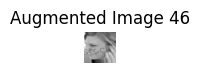

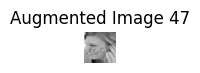

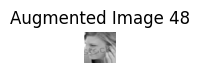

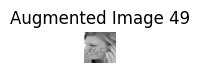

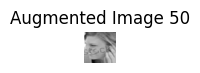

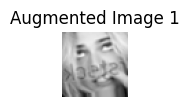

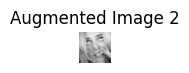

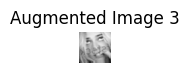

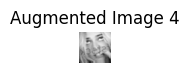

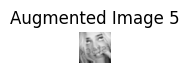

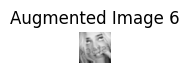

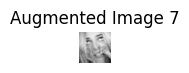

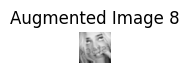

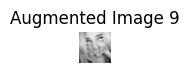

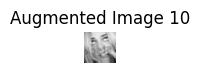

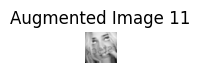

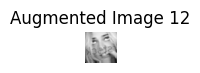

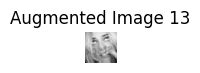

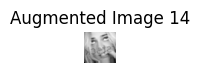

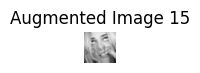

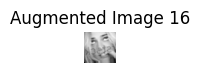

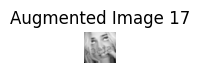

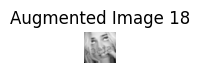

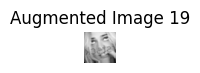

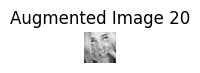

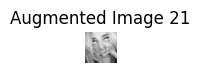

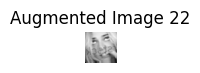

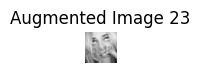

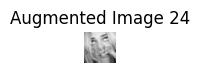

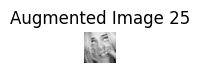

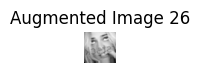

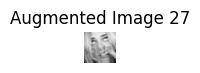

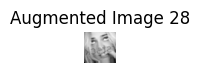

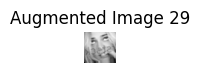

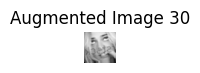

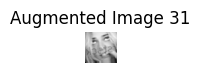

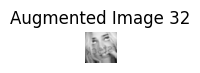

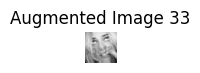

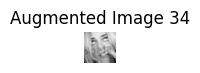

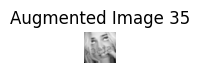

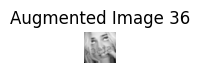

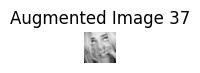

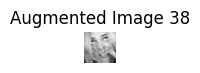

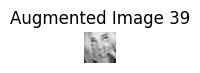

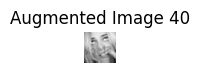

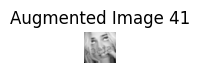

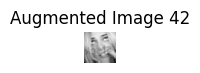

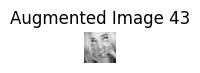

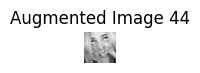

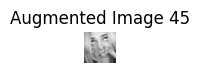

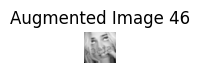

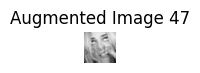

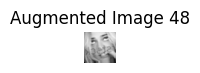

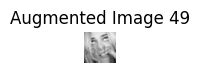

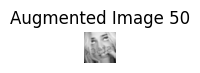

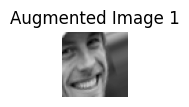

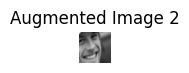

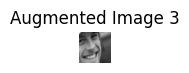

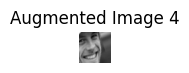

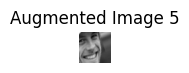

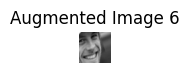

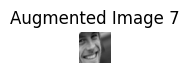

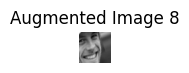

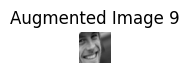

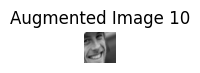

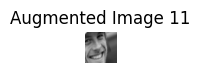

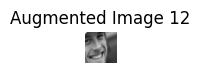

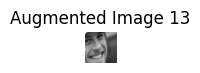

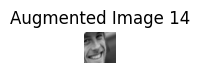

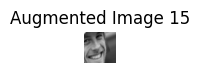

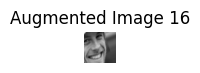

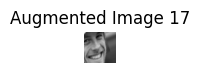

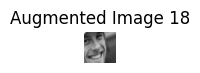

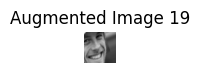

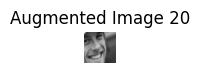

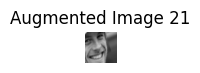

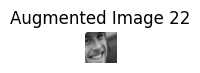

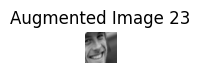

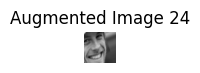

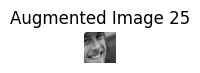

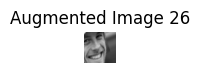

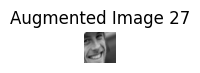

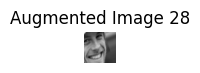

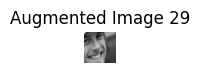

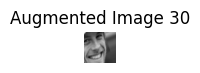

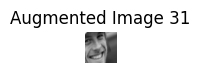

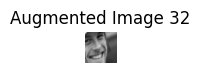

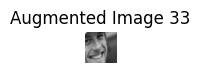

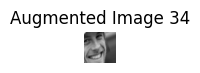

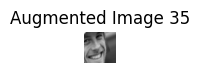

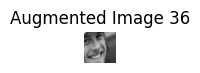

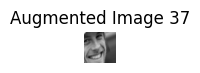

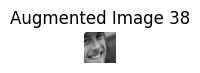

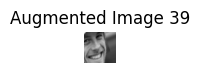

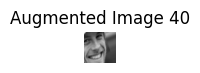

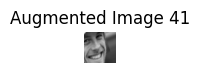

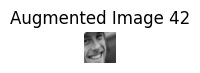

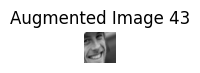

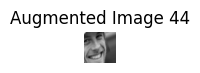

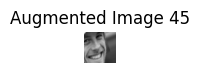

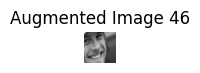

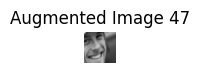

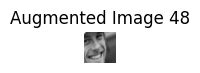

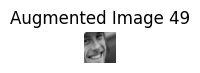

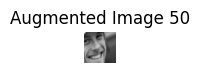

In [6]:
num_augmented_images = 7  # Set the number of augmented images to generate for visualization
for i in range(num_augmented_images):
    augmented_image, _ = train_generator.next()  # Generate an augmented batch
    augmented_image = augmented_image[0]  # Consider the first image from the batch
    
    # Plot the augmented image
    plt.figure(figsize=(15, 10))
    for i in range(50):
    #plt.figure(figsize=(4, 7))
        plt.subplot(10, 5, i + 1)
        plt.imshow(augmented_image.squeeze(), cmap='gray')  # Squeeze to remove the single-channel dimension for grayscale images
        plt.axis('off')
        plt.title(f'Augmented Image {i+1}')
        plt.show()

(7178, 224, 224, 3) (0,)


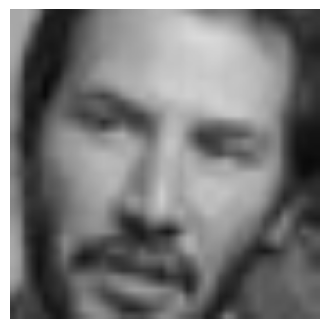

In [7]:
test_path=r'Downloads/Project 1/Project 1/test'
x_test=[]
test_labels = []
classes = 7
for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))
        x_test.append(img_arr)
plt.figure(figsize=(4,5))
plt.axis('off')
plt.imshow(img_arr)

test_x=np.array(x_test)
test_labels = np.array(test_labels)
print(test_x.shape, test_labels.shape) 


In [8]:
validation_data_gen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
validation_generator = validation_data_gen.flow_from_directory(
        test_path,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


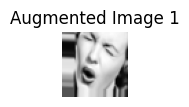

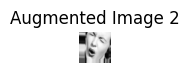

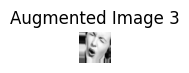

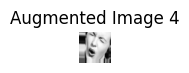

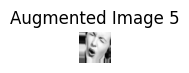

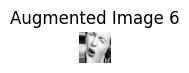

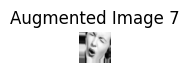

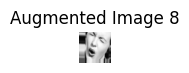

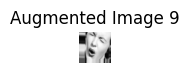

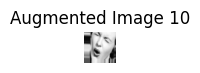

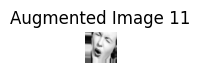

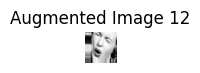

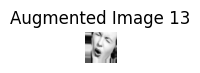

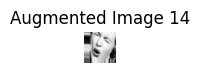

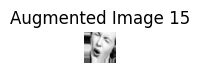

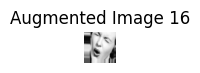

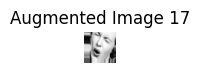

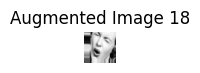

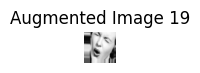

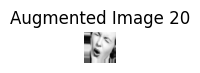

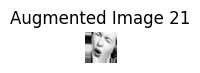

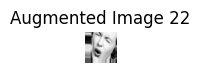

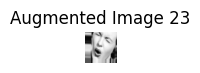

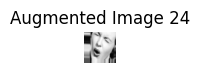

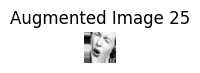

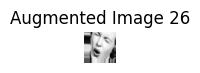

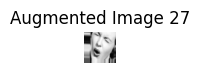

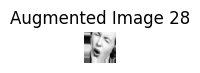

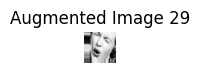

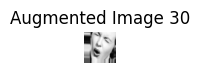

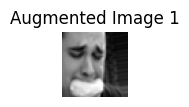

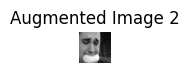

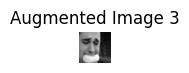

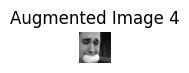

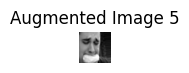

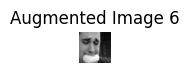

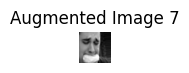

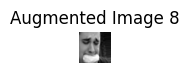

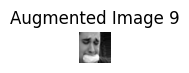

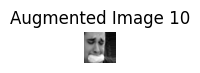

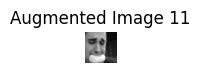

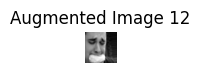

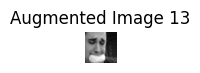

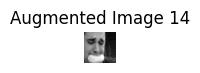

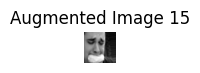

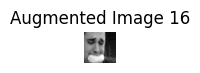

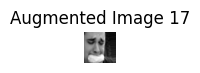

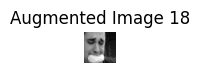

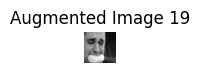

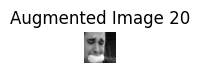

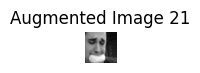

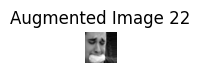

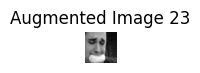

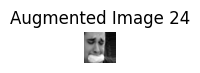

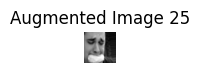

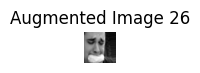

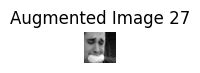

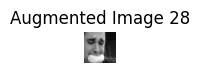

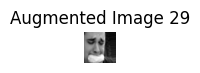

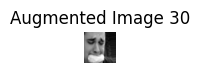

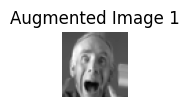

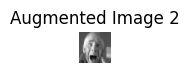

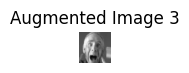

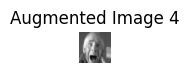

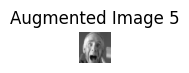

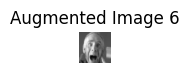

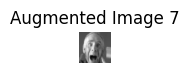

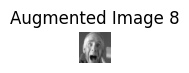

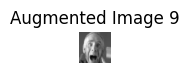

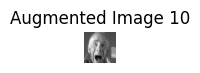

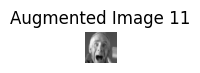

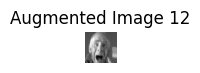

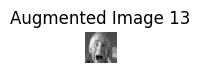

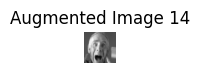

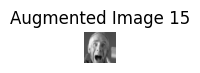

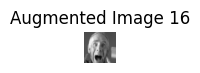

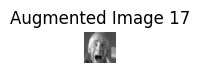

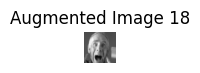

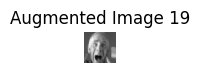

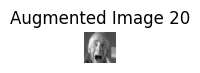

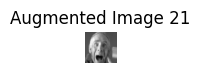

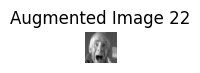

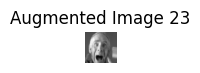

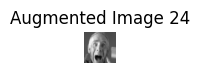

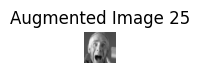

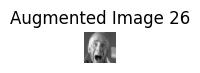

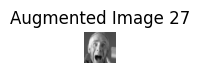

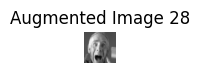

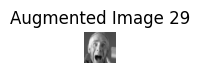

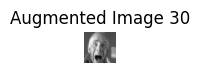

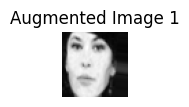

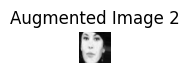

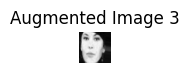

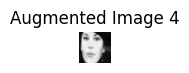

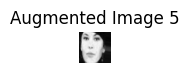

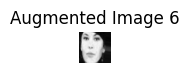

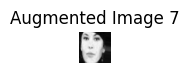

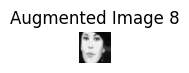

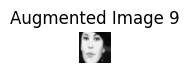

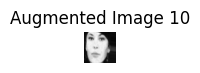

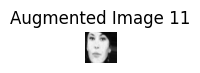

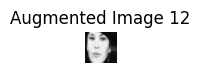

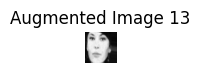

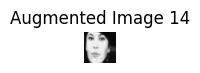

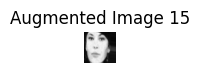

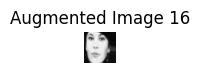

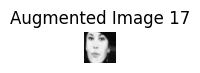

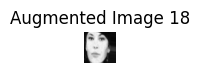

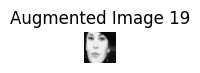

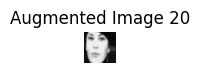

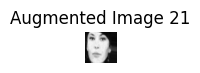

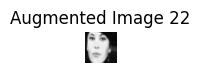

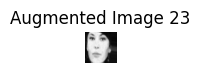

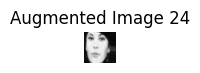

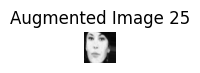

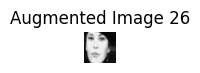

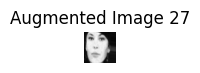

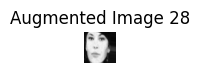

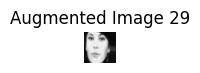

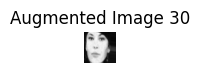

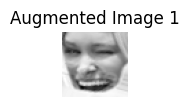

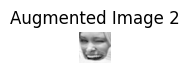

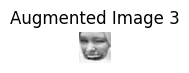

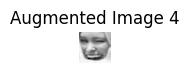

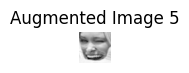

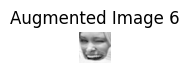

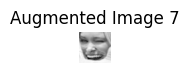

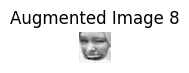

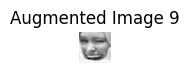

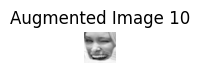

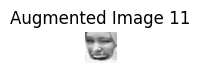

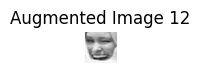

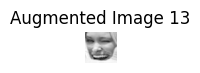

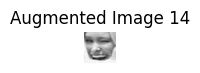

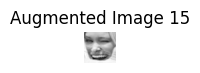

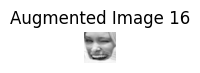

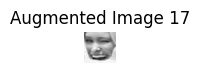

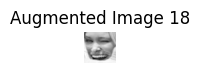

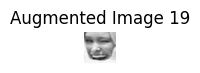

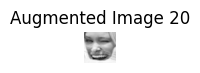

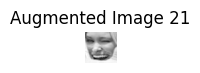

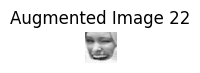

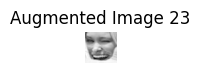

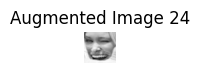

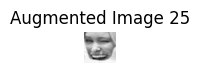

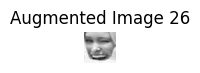

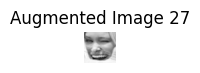

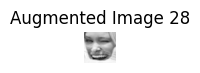

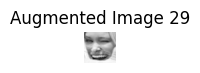

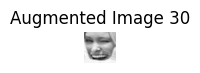

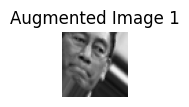

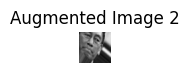

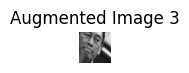

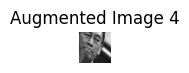

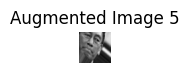

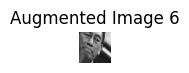

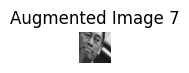

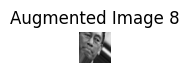

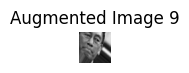

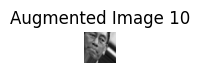

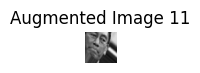

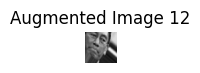

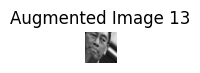

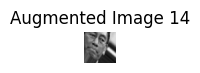

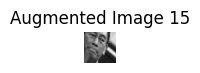

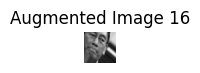

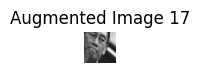

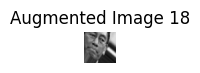

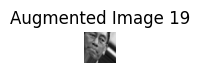

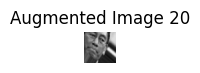

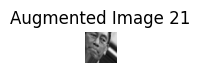

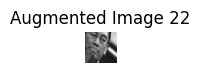

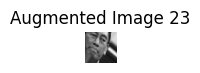

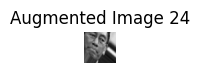

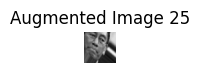

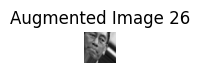

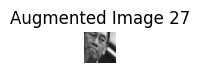

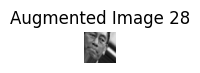

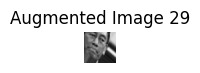

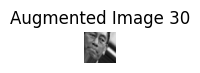

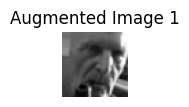

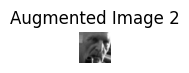

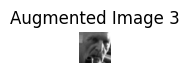

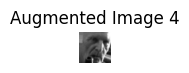

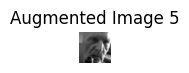

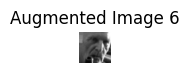

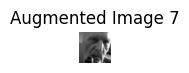

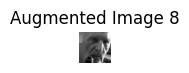

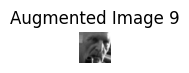

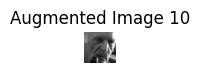

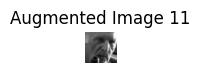

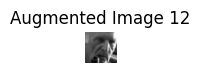

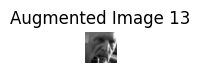

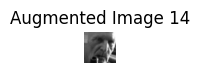

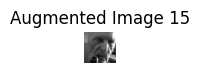

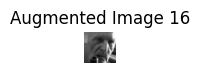

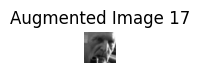

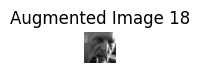

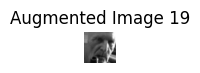

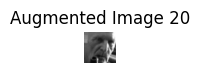

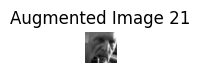

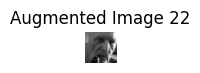

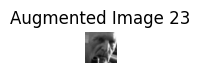

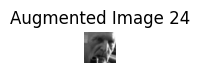

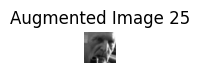

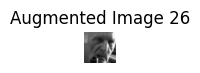

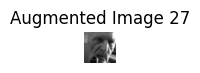

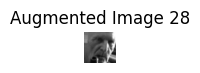

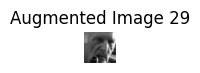

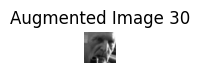

In [9]:
num_augmented_images = 7  # Set the number of augmented images to generate for visualization
for i in range(num_augmented_images):
    augmented_image, _ = train_generator.next()  # Generate an augmented batch
    augmented_image = augmented_image[0]  # Consider the first image from the batch
    
    # Plot the augmented image
    plt.figure(figsize=(15, 10))
    for i in range(30):
    #plt.figure(figsize=(4, 7))
        plt.subplot(10, 3, i + 1)
        plt.imshow(augmented_image.squeeze(), cmap='gray')  # Squeeze to remove the single-channel dimension for grayscale images
        plt.axis('off')
        plt.title(f'Augmented Image {i+1}')
        plt.show()

In [10]:
emotion_model = Sequential()
 
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                         input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
 
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
 
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))
 
emotion_model.summary()
 
cv2.ocl.setUseOpenCL(False)
 
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000, 
                               decay_rate=0.96)
 
optimizer = Adam(learning_rate=lr_schedule)
 
emotion_model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
                      metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

In [11]:
# Now train your model using final_train_x and train_y
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=7178 // 64)



Epoch 1/2


448/448 [==============================] - 157s 344ms/step - loss: 1.8217 - accuracy: 0.2472 - val_loss: 1.8230 - val_accuracy: 0.2515
Epoch 2/2
448/448 [==============================] - 143s 319ms/step - loss: 1.7925 - accuracy: 0.2509 - val_loss: 1.7918 - val_accuracy: 0.2543


In [12]:
emotion_model.evaluate(validation_generator)

113/113 [==============================] - 14s 120ms/step - loss: 1.7914 - accuracy: 0.2506


[1.7914046049118042, 0.25062692165374756]

In [13]:
accuracy = emotion_model_info.history['accuracy']
val_accuracy = emotion_model_info.history['val_accuracy']
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']

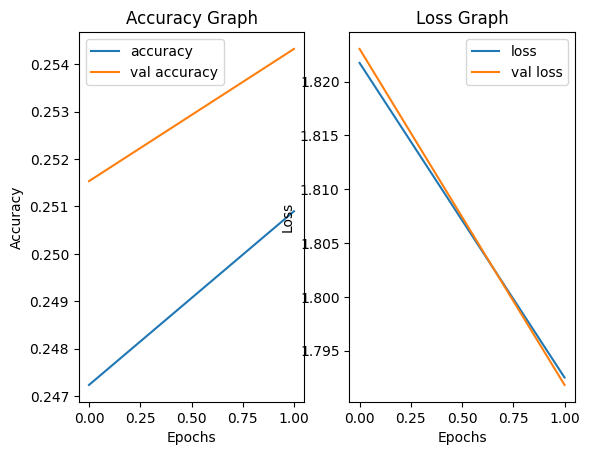

In [14]:
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
 
# loss graph
plt.subplot(1, 2, 2)
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
 
plt.show()

In [15]:
from tensorflow.keras.models import load_model
emotion_model.save("emotion_model_face_rec.h5")


In [16]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 
                3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}


113/113 [==============================] - 13s 116ms/step
Confusion Matrix:
[[   0    0    0  812   73   73    0]
 [   0    0    0   99    4    8    0]
 [   0    0    0  886   55   83    0]
 [   0    0    0 1560   96  118    0]
 [   0    0    0 1052   79  102    0]
 [   0    0    0 1095   64   88    0]
 [   0    0    0  736   43   52    0]]

Classification Report:
              precision    recall  f1-score   support

       Angry       0.00      0.00      0.00       958
   Disgusted       0.00      0.00      0.00       111
     Fearful       0.00      0.00      0.00      1024
       Happy       0.25      0.88      0.39      1774
     Neutral       0.19      0.06      0.10      1233
         Sad       0.17      0.07      0.10      1247
   Surprised       0.00      0.00      0.00       831

    accuracy                           0.24      7178
   macro avg       0.09      0.14      0.08      7178
weighted avg       0.12      0.24      0.13      7178



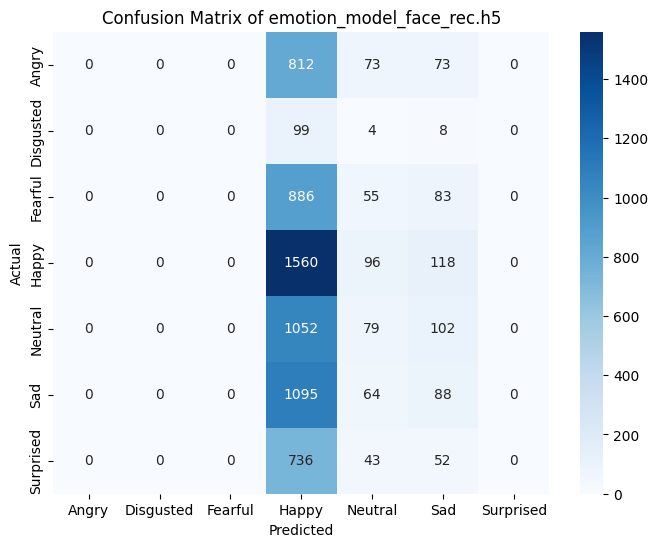

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
import seaborn as sns
y_pred_probabilities = emotion_model.predict(validation_generator)
y_pred = np.argmax(y_pred_probabilities, axis=1)  # Convert probabilities to class labels
test_labels  = ["Angry", "Disgusted",  "Fearful", 
                 "Happy", "Neutral",  "Sad",  "Surprised"]
true_labels = validation_generator.classes
# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(true_labels, y_pred, target_names=test_labels))

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=test_labels, yticklabels=test_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of emotion_model_face_rec.h5')
plt.show()

In [18]:
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)
# Overall accuracy
print ("Angry", "Disgusted",  "Fearful", 
                 "Happy", "Neutral",  "Sad",  "Surprised")
ACC = (TP+TN)/(TP+FP+FN+TN)
print (ACC)
Precision=(TP)/(TP+FP) 
print (Precision)
Recall= (TP)/(TP+FN)
print (Recall)
f1_score=(2 * Precision + Recall) / (Precision * Recall)
print (f1_score)


Angry Disgusted Fearful Happy Neutral Sad Surprised
[0.86653664 0.98453608 0.85734188 0.31819448 0.7925606  0.77779326
 0.88422959]
[       nan        nan        nan 0.25       0.19082126 0.16793893
        nan]
[0.         0.         0.         0.87936866 0.06407137 0.07056937
 0.        ]
[        nan         nan         nan  6.27435897 36.4556962  34.29545455
         nan]


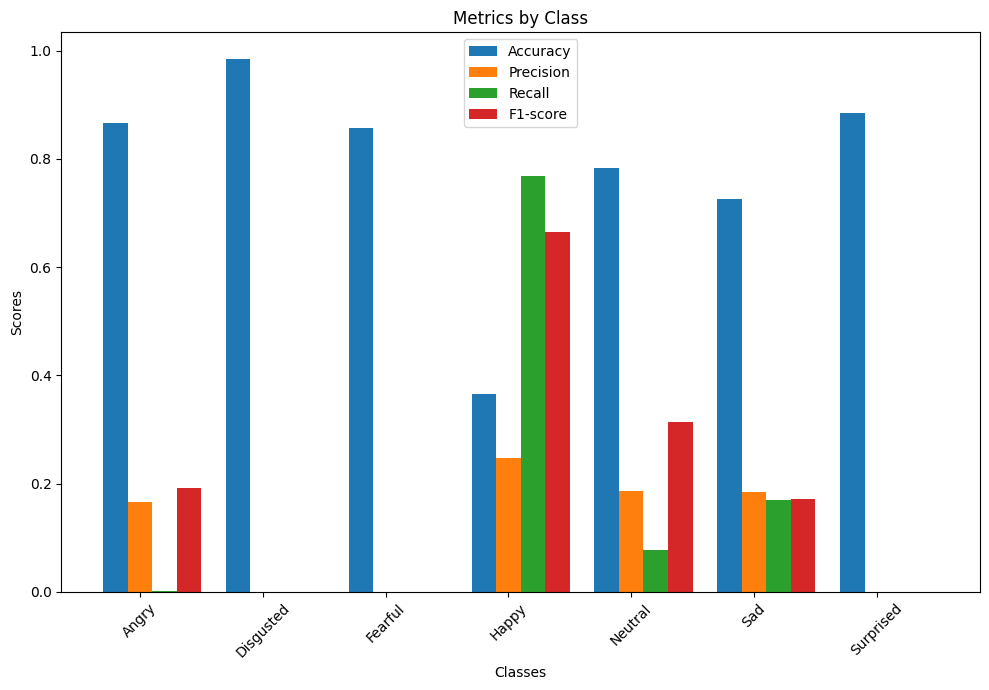

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have calculated the metrics for each class and stored them in lists or arrays

# List of classes (replace with your class names)
classes = ["Angry", "Disgusted",  "Fearful", 
                 "Happy", "Neutral",  "Sad",  "Surprised"]

# Example metrics for illustration (replace these with your actual metrics)
accuracy = np.array([0.86597938, 0.98453608, 0.85734188, 0.36472555, 0.78378378, 0.72527166, 0.88422959])
precision = np.array([0.16666667,        0,        0, 0.24737033, 0.18664047, 0.18450827, 0])
recall = np.array([0.00104384, 0. ,        0.  ,       0.76888388, 0.07704785, 0.17000802, 0.])
f1_score = np.array([0.1922, 0, 0, 0.664368501, 0.3131,0.1718396226,  0])

# Plotting the metrics for each class
x = np.arange(len(classes))
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 7))

# Plotting accuracy
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
# Plotting precision
rects2 = ax.bar(x, precision, width, label='Precision')
# Plotting recall
rects3 = ax.bar(x + width, recall, width, label='Recall')
# Plotting F1-score
rects4 = ax.bar(x + 2 * width, f1_score, width, label='F1-score')

# Adding labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Show plot
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()



2/2 [==============================] - 0s 64ms/step


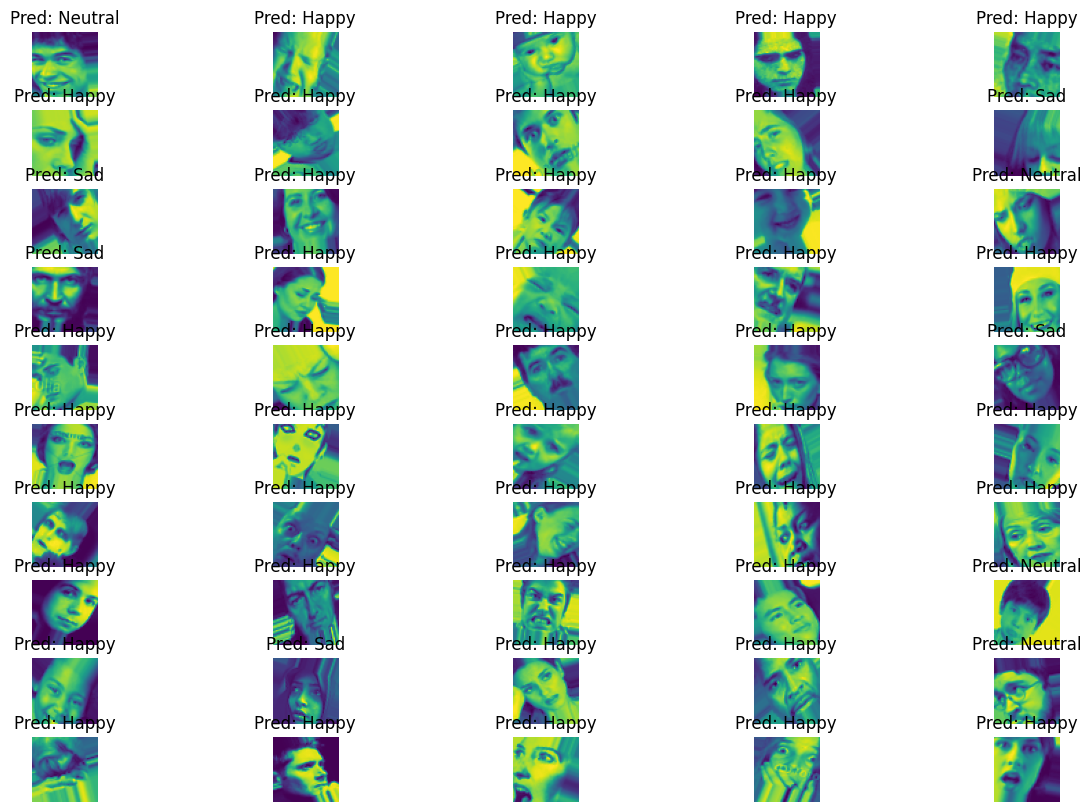

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model
emotion_model = load_model('emotion_model_face_rec.h5')  # Replace 'your_model_path_here' with the actual path

# Assuming you have the validation generator ('validation_generator')
# Make predictions on the validation data
preds = emotion_model.predict(validation_generator)

# Mapping class indices to their respective labels
class_labels = ["Angry", "Disgusted", "Fearful", "Happy", "Neutral", "Sad", "Surprised"]

# Display images with predicted and true labels
for i in range(10):
    # Get a batch of validation data (images and labels)
    validation_data_batch = validation_generator[i]
    images = validation_data_batch[0]  # Images
    true_labels_batch = validation_data_batch[1]  # True labels

    # Predict on the batch of images
    pred_labels_batch = emotion_model.predict(images)
    plt.figure(figsize=(15, 10))
    # Display each image with its predicted and true labels
    for j in range(len(images)):
        subplot_index = i * len(images) + j + 1
        if subplot_index <= 50:  # Ensure the subplot index doesn't exceed 50
            plt.subplot(10, 5, subplot_index)
            plt.title('Pred: {}'.format(class_labels[np.argmax(pred_labels_batch[j])], class_labels[np.argmax(true_labels_batch[j])]))
            #plt.title('Pred: {}'.format(class_labels[np.argmax(preds[i])], class_labels[np.argmax(test_y[i])]))
            plt.imshow(images[j])  # Display the image
            plt.axis('off')

plt.tight_layout()
plt.show()

In [22]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load pre-trained model for emotion recognition
emotion_model = load_model('emotion_model_face_rec.h5')  # Replace with the path to your model file

# Define labels for different emotions
emotion_labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

# Load pre-trained Haarcascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# OpenCV for accessing webcam
cap = cv2.VideoCapture(0)  # Use 0 for the default webcam, or specify another index if multiple cameras are available

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Perform face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Extract the detected face region
        detected_face = frame[y:y + h, x:x + w]

        # Preprocess the detected face to match the input shape of your model
        resized_face = cv2.resize(detected_face, (224, 224))  # Assuming the model expects 48x48 input images
        normalized_face = resized_face / 255.0  # Normalize pixel values

        # If needed, perform additional preprocessing based on the model's requirements
        processed_face = np.expand_dims(normalized_face, axis=0)  # Add batch dimension if required

        # Perform emotion prediction using the pre-trained model
        emotion_probs = emotion_model.predict(processed_face)
        predicted_emotion_label = np.argmax(emotion_probs)

        # Get the predicted emotion label from the dictionary
        predicted_emotion = emotion_labels.get(predicted_emotion_label)

        # Draw a rectangle around the detected face and display the predicted emotion label
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, f"Emotion: {predicted_emotion}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Display the frame with emotion information
    cv2.imshow('Real-time Emotion Detection with Facial Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


ValueError: in user code:

    File "C:\Users\newhp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\newhp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\newhp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\newhp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\newhp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\newhp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 48, 48, 1), found shape=(None, 224, 224, 3)
